In [1]:
#importar bibliotecas 
import scipy as scp
import math as math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# #from kneed import KneeLocator
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score, normalized_mutual_info_score
# from sklearn.cluster import DBSCAN, OPTICS

# from sklearn.model_selection import train_test_split

# from sklearn.neighbors import NearestNeighbors

# from sklearn.metrics import adjusted_rand_score
# from sklearn.metrics import classification_report

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [2]:
train_imgs = pd.read_csv('/content/sample_data/mnist_train_small.csv'); train_imgs.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_imgs.iloc[:,0]

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64

In [4]:
train_imgs.iloc[:,1:].to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
train_imgs.shape

(19999, 785)

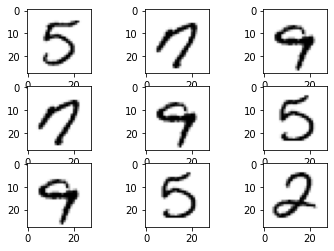

In [6]:
ax, fig = plt.subplots(3,3)

for i in range(3):
  for j in range(3):
    img = (train_imgs.iloc[i+j,1:].to_numpy()).reshape((28,28))
    fig[i][j].imshow(img, cmap="Greys")

In [7]:
pca = KernelPCA(2)
X_pca = pca.fit_transform(train_imgs.iloc[:,1:])


In [8]:
train_imgs.iloc[:,0]

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64

In [9]:
X_pca = pd.DataFrame(X_pca, columns=['Componente_Principal_1', 'Componente_Principal_2']);X_pca

,Componente_Principal_1,Componente_Principal_2
0,446.468432,-254.669627
1,509.220207,729.949600
2,346.927822,716.677304
3,447.113255,-303.558804
4,324.505202,-126.923982
...,...,...
19994,702.231308,-144.265044
19995,-854.957279,-173.136854
19996,592.245861,-73.043494
19997,-363.628846,288.170586


In [10]:
X_pca['Componente_Principal_1']

0        446.468432
1        509.220207
2        346.927822
3        447.113255
4        324.505202
            ...    
19994    702.231308
19995   -854.957279
19996    592.245861
19997   -363.628846
19998    363.140365
Name: Componente_Principal_1, Length: 19999, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


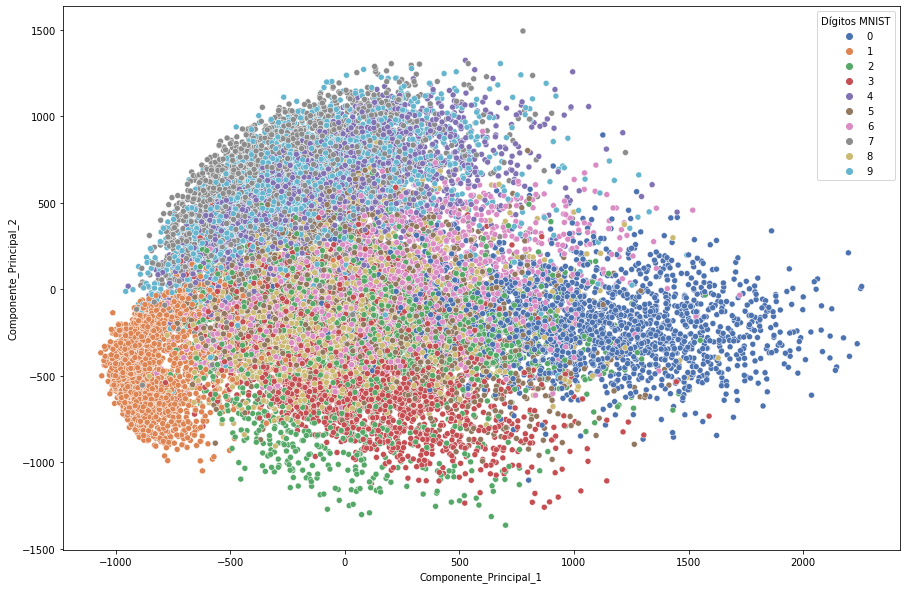

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(X_pca['Componente_Principal_1'], X_pca['Componente_Principal_2'], hue=train_imgs.iloc[:,0].rename('Dígitos MNIST'), palette="deep"  )

In [ ]:
tsne = TSNE(2)
X_tsne = tsne.fit_transform(train_imgs.iloc[:,1:]) 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
X_tsne = pd.DataFrame(X_tsne, columns=['t-SNE_1', 't-SNE_2']);X_tsne

In [ ]:
X_tsne['t-SNE_1']

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(X_tsne['t-SNE_1'], X_tsne['t-SNE_2'], hue=train_imgs.iloc[:,0].rename('Digitos MNIST'), palette="deep" )
